<a href="https://colab.research.google.com/github/samarkinav/Test-MGNT/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%9C%D0%B0%D0%B3%D0%BD%D0%B8%D1%82%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

## Чтение данных

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/samarkinav/Test-MGNT/main/data_regression_for_task.csv?token=ARDNBEEXJHLW6CJRFUGHVVTBRZ6IO')

In [3]:
df.head(5)

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   YEAR           128355 non-null  int64  
 1   MONTH          128355 non-null  int64  
 2   CONTRAGENT     128331 non-null  object 
 3   ARTICLE_CODE   128355 non-null  object 
 4   ARTICLE_NAME   128355 non-null  object 
 5   ARTICLE_GROUP  128354 non-null  object 
 6   SALES          128355 non-null  float64
 7   STORE_SALES    128355 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 7.8+ MB


Есть пропущенные значения в признаках CONTRAGENT, ARTICLE_GROUP. 
Имеем 4 числовых признака и 4 категориальных.

In [5]:
df.describe()

,YEAR,MONTH,SALES,STORE_SALES
count,128355.000000,128355.000000,1.283550e+05,128355.000000
mean,2017.206030,7.079303,6.563037e+03,22.624213
std,0.404454,3.645826,2.892494e+04,239.693277
min,2017.000000,1.000000,-6.490000e+03,-4996.000000
25%,2017.000000,5.000000,0.000000e+00,0.000000
50%,2017.000000,8.000000,3.300000e+02,1.000000
75%,2017.000000,10.000000,3.250000e+03,4.000000
max,2018.000000,12.000000,1.616600e+06,16271.750000


В признаках SALES и STORE_SALES есть отрицательные значения.

In [6]:
df.describe(include=['object'])

,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP
count,128331,128355,128355,128354
unique,333,23556,23624,8
top,REPUBLIC NATIONAL DISTRIBUTING CO,84620,LA VIELLE FERME CDV RED - 750ML,WINE
freq,9847,10,19,79077


## Боремся с выбросами


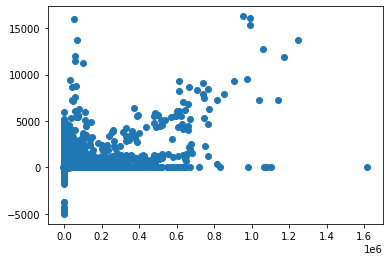

In [7]:
plt.scatter(df['SALES'], df['STORE_SALES'])
pass

In [8]:
df['SALES'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005         0.0
0.010         0.0
0.050         0.0
0.100         0.0
0.500       330.0
0.900     13870.0
0.950     28500.0
0.990     99935.2
0.995    154915.3
Name: SALES, dtype: float64

In [9]:
df['STORE_SALES'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      0.000
0.010      0.000
0.050      0.000
0.100      0.000
0.500      1.000
0.900     18.000
0.950     49.000
0.990    394.865
0.995    742.092
Name: STORE_SALES, dtype: float64

Удалим все строки таблицы, в которых 'SALES' или 'STORE_SALES' выходят за пределы квантилей $0.005$, $0.995$.

In [10]:
rows_to_drop = df[
    (df['SALES'] < df['SALES'].quantile(0.005)) | (df['SALES'] > df['SALES'].quantile(0.995)) | 
    (df['STORE_SALES']  < df['STORE_SALES'].quantile(0.005)) | (df['STORE_SALES']  > df['STORE_SALES'].quantile(0.995))].index
data = df.drop(rows_to_drop)

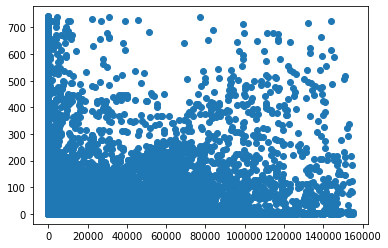

In [11]:
plt.scatter(data['SALES'], data['STORE_SALES'])
pass

In [12]:
corr_mat = data.corr()
corr_mat

,YEAR,MONTH,SALES,STORE_SALES
YEAR,1.000000,-0.780062,-0.013050,-0.001518
MONTH,-0.780062,1.000000,0.039019,0.008503
SALES,-0.013050,0.039019,1.000000,0.314203
STORE_SALES,-0.001518,0.008503,0.314203,1.000000


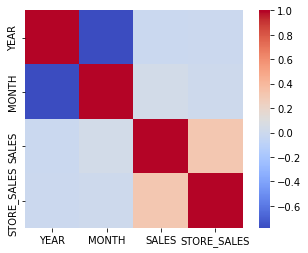

In [13]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [14]:
data['ARTICLE_GROUP'].value_counts()

WINE            78795
LIQUOR          28083
BEER            15640
KEGS             3593
NON-ALCOHOL       620
STR_SUPPLIES      105
REF                35
Name: ARTICLE_GROUP, dtype: int64

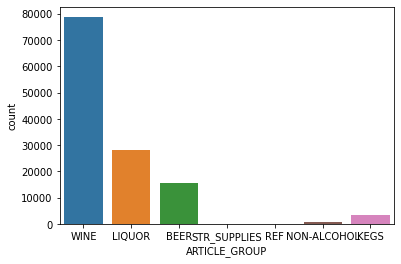

In [15]:
sns.countplot(x='ARTICLE_GROUP', data=data)
pass

## Заполнение пропущенных значений

In [16]:
data.isna().sum()

YEAR             0
MONTH            0
CONTRAGENT       0
ARTICLE_CODE     0
ARTICLE_NAME     0
ARTICLE_GROUP    1
SALES            0
STORE_SALES      0
dtype: int64

Есть пропущенное значение в категориальном признаке, заполним его модой.

In [17]:
data['ARTICLE_GROUP'].fillna(data['ARTICLE_GROUP'].mode().iloc[0], inplace=True)

In [18]:
data['ARTICLE_GROUP'].isna().sum()

0

## Отбор признаков

In [19]:
def metric(y_true, y_pred):
    
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_pred) * 100

Для начала переведем все категориальные признаки к типу category, не будем их кодировать.

In [20]:
data['YEAR'] = data['YEAR'].astype('category')
data['MONTH'] = data['MONTH'].astype('category')
data['CONTRAGENT'] = data['CONTRAGENT'].astype('category')
data['ARTICLE_CODE'] = data['ARTICLE_CODE'].astype('category')
data['ARTICLE_NAME'] = data['ARTICLE_NAME'].astype('category')
data['ARTICLE_GROUP'] = data['ARTICLE_GROUP'].astype('category')

In [21]:
data.dtypes

YEAR             category
MONTH            category
CONTRAGENT       category
ARTICLE_CODE     category
ARTICLE_NAME     category
ARTICLE_GROUP    category
SALES             float64
STORE_SALES       float64
dtype: object

In [22]:
test_df = data.query("YEAR == 2018 & MONTH == 2")
train_df = data.drop(test_df.index)

In [23]:
X_train = train_df.drop(['ARTICLE_CODE', 'ARTICLE_NAME','SALES'], axis=1)
y_train = train_df['SALES']
X_test = test_df.drop(['ARTICLE_CODE', 'ARTICLE_NAME', 'SALES'], axis=1)
y_test = test_df['SALES']

In [24]:
X_train.head()

,YEAR,MONTH,CONTRAGENT,ARTICLE_GROUP,STORE_SALES
0,2017,4,ROYAL WINE CORP,WINE,0.0
1,2017,4,SANTA MARGHERITA USA INC,WINE,0.0
2,2017,4,JIM BEAM BRANDS CO,LIQUOR,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,LIQUOR,0.0
4,2017,4,ROYAL WINE CORP,WINE,0.0


In [25]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [27]:
lg = lgb.LGBMRegressor(silent=False)
parametrs = {"n_estimators": range(10,200,10)}
grid_search_cv = GridSearchCV(lg, n_jobs=-1, param_grid=parametrs, cv=10)
grid_search_cv.fit(X_train,y_train)
best_n_estimators = grid_search_cv.best_estimator_.n_estimators
print(best_n_estimators)

50


In [28]:
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves':31, 'objective':'regression', 'learning_rate':0.06}
num_round = best_n_estimators
cate_features_name = ['YEAR','MONTH','CONTRAGENT','ARTICLE_GROUP']
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data], categorical_feature = cate_features_name)
y_test_predict_lgbm = bst.predict(X_test)

[1]	valid_0's l2: 1.67459e+08
[2]	valid_0's l2: 1.59068e+08
[3]	valid_0's l2: 1.51751e+08
[4]	valid_0's l2: 1.45124e+08
[5]	valid_0's l2: 1.39349e+08
[6]	valid_0's l2: 1.34155e+08
[7]	valid_0's l2: 1.29653e+08
[8]	valid_0's l2: 1.256e+08
[9]	valid_0's l2: 1.22006e+08
[10]	valid_0's l2: 1.18827e+08
[11]	valid_0's l2: 1.1604e+08
[12]	valid_0's l2: 1.13565e+08
[13]	valid_0's l2: 1.11449e+08
[14]	valid_0's l2: 1.09535e+08
[15]	valid_0's l2: 1.07831e+08
[16]	valid_0's l2: 1.06344e+08


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['ARTICLE_GROUP', 'CONTRAGENT', 'MONTH', 'YEAR']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[17]	valid_0's l2: 1.05059e+08
[18]	valid_0's l2: 1.03815e+08
[19]	valid_0's l2: 1.02785e+08
[20]	valid_0's l2: 1.01901e+08
[21]	valid_0's l2: 1.00888e+08
[22]	valid_0's l2: 1.00217e+08
[23]	valid_0's l2: 9.96407e+07
[24]	valid_0's l2: 9.88822e+07
[25]	valid_0's l2: 9.83376e+07
[26]	valid_0's l2: 9.76983e+07
[27]	valid_0's l2: 9.71437e+07
[28]	valid_0's l2: 9.66615e+07
[29]	valid_0's l2: 9.63536e+07
[30]	valid_0's l2: 9.60378e+07
[31]	valid_0's l2: 9.56662e+07
[32]	valid_0's l2: 9.53372e+07
[33]	valid_0's l2: 9.51401e+07
[34]	valid_0's l2: 9.48636e+07
[35]	valid_0's l2: 9.46685e+07
[36]	valid_0's l2: 9.45978e+07
[37]	valid_0's l2: 9.44592e+07
[38]	valid_0's l2: 9.42354e+07
[39]	valid_0's l2: 9.4142e+07
[40]	valid_0's l2: 9.39582e+07
[41]	valid_0's l2: 9.3877e+07
[42]	valid_0's l2: 9.38568e+07
[43]	valid_0's l2: 9.37323e+07
[44]	valid_0's l2: 9.37358e+07
[45]	valid_0's l2: 9.37683e+07
[46]	valid_0's l2: 9.36847e+07
[47]	valid_0's l2: 9.36696e+07
[48]	valid_0's l2: 9.35818e+07
[49]	valid

In [29]:
metric(y_test,y_test_predict_lgbm)

79.2069110851852

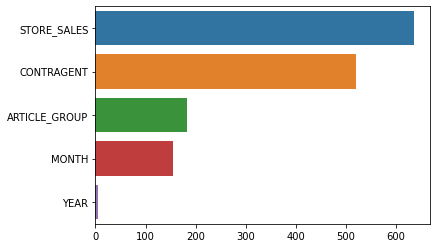

In [30]:
importances = pd.Series(bst.feature_importance(), index=X_test.columns).sort_values(ascending=False)
sns.barplot(y=importances.index, x=importances)
pass

Попробуем исключить признаки даты (месяц и год)

In [31]:
X_train = train_df.drop(['YEAR', 'MONTH', 'ARTICLE_CODE', 'ARTICLE_NAME','SALES'], axis=1)
y_train = train_df['SALES']
X_test = test_df.drop(['YEAR', 'MONTH', 'ARTICLE_CODE', 'ARTICLE_NAME', 'SALES'], axis=1)
y_test = test_df['SALES']

In [32]:
lg = lgb.LGBMRegressor(silent=False)
parametrs = {"n_estimators": range(10,200,10)}
grid_search_cv = GridSearchCV(lg, n_jobs=-1, param_grid=parametrs, cv=10)
grid_search_cv.fit(X_train,y_train)
best_n_estimators = grid_search_cv.best_estimator_.n_estimators
print(best_n_estimators)

70


In [33]:
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves':31, 'objective':'regression', 'learning_rate':0.06}
num_round = best_n_estimators
cate_features_name = ['CONTRAGENT','ARTICLE_GROUP']
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data], categorical_feature = cate_features_name)
y_test_predict_lgbm = bst.predict(X_test)

[1]	valid_0's l2: 1.67241e+08
[2]	valid_0's l2: 1.58632e+08
[3]	valid_0's l2: 1.51082e+08
[4]	valid_0's l2: 1.44295e+08
[5]	valid_0's l2: 1.38252e+08
[6]	valid_0's l2: 1.32829e+08
[7]	valid_0's l2: 1.28114e+08
[8]	valid_0's l2: 1.23948e+08
[9]	valid_0's l2: 1.20179e+08
[10]	valid_0's l2: 1.16839e+08
[11]	valid_0's l2: 1.13839e+08
[12]	valid_0's l2: 1.11238e+08
[13]	valid_0's l2: 1.08872e+08
[14]	valid_0's l2: 1.06789e+08
[15]	valid_0's l2: 1.05011e+08
[16]	valid_0's l2: 1.03352e+08
[17]	valid_0's l2: 1.01954e+08
[18]	valid_0's l2: 1.0069e+08
[19]	valid_0's l2: 9.9506e+07
[20]	valid_0's l2: 9.84628e+07


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['ARTICLE_GROUP', 'CONTRAGENT']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[21]	valid_0's l2: 9.75994e+07
[22]	valid_0's l2: 9.67492e+07
[23]	valid_0's l2: 9.59671e+07
[24]	valid_0's l2: 9.53498e+07
[25]	valid_0's l2: 9.46776e+07
[26]	valid_0's l2: 9.40963e+07
[27]	valid_0's l2: 9.36508e+07
[28]	valid_0's l2: 9.31992e+07
[29]	valid_0's l2: 9.28034e+07
[30]	valid_0's l2: 9.24034e+07
[31]	valid_0's l2: 9.21041e+07
[32]	valid_0's l2: 9.17745e+07
[33]	valid_0's l2: 9.15395e+07
[34]	valid_0's l2: 9.13096e+07
[35]	valid_0's l2: 9.11086e+07
[36]	valid_0's l2: 9.08714e+07
[37]	valid_0's l2: 9.07188e+07
[38]	valid_0's l2: 9.0513e+07
[39]	valid_0's l2: 9.04042e+07
[40]	valid_0's l2: 9.02377e+07
[41]	valid_0's l2: 9.00947e+07
[42]	valid_0's l2: 8.99619e+07
[43]	valid_0's l2: 8.98684e+07
[44]	valid_0's l2: 8.97555e+07
[45]	valid_0's l2: 8.95864e+07
[46]	valid_0's l2: 8.94849e+07
[47]	valid_0's l2: 8.94151e+07
[48]	valid_0's l2: 8.93744e+07
[49]	valid_0's l2: 8.93163e+07
[50]	valid_0's l2: 8.92646e+07
[51]	valid_0's l2: 8.92111e+07
[52]	valid_0's l2: 8.91802e+07
[53]	vali

In [34]:
metric(y_test,y_test_predict_lgbm)

76.7848686684721

Как видно, убрав признаки год и месяц, потеряли точность модели. Попробуем преобразовать эти два признака в один - количество месяцев с момента начала данных

In [35]:
data['DAY'] = 1
data['date'] = pd.to_datetime(data[['YEAR', 'MONTH', 'DAY']])
data['date_delta'] = round((data['date'] - data['date'].min())/np.timedelta64(1,'M'))

In [36]:
test_df = data.query("YEAR == 2018 & MONTH == 2")
train_df = data.drop(test_df.index)

In [37]:
X_train = train_df.drop(['YEAR', 'MONTH', 'ARTICLE_CODE', 'ARTICLE_NAME','SALES', 'DAY', 'date'], axis=1)
y_train = train_df['SALES']
X_test = test_df.drop(['YEAR', 'MONTH', 'ARTICLE_CODE', 'ARTICLE_NAME', 'SALES', 'DAY', 'date'], axis=1)
y_test = test_df['SALES']

In [38]:
X_train.head()

,CONTRAGENT,ARTICLE_GROUP,STORE_SALES,date_delta
0,ROYAL WINE CORP,WINE,0.0,0.0
1,SANTA MARGHERITA USA INC,WINE,0.0,0.0
2,JIM BEAM BRANDS CO,LIQUOR,0.0,0.0
3,HEAVEN HILL DISTILLERIES INC,LIQUOR,0.0,0.0
4,ROYAL WINE CORP,WINE,0.0,0.0


In [39]:
lg = lgb.LGBMRegressor(silent=False)
parametrs = {"n_estimators": range(10,200,10)}
grid_search_cv = GridSearchCV(lg, n_jobs=-1, param_grid=parametrs, cv=10)
grid_search_cv.fit(X_train,y_train)
best_n_estimators = grid_search_cv.best_estimator_.n_estimators
print(best_n_estimators)

90


In [40]:
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves':31, 'objective':'regression', 'learning_rate':0.06}
num_round = best_n_estimators
cate_features_name = ['CONTRAGENT','ARTICLE_GROUP']
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data], categorical_feature = cate_features_name)
y_test_predict_lgbm = bst.predict(X_test)

[1]	valid_0's l2: 1.67255e+08
[2]	valid_0's l2: 1.58646e+08
[3]	valid_0's l2: 1.5113e+08
[4]	valid_0's l2: 1.44316e+08
[5]	valid_0's l2: 1.38331e+08
[6]	valid_0's l2: 1.32951e+08
[7]	valid_0's l2: 1.28279e+08
[8]	valid_0's l2: 1.24034e+08
[9]	valid_0's l2: 1.20265e+08
[10]	valid_0's l2: 1.16907e+08
[11]	valid_0's l2: 1.13957e+08
[12]	valid_0's l2: 1.11268e+08
[13]	valid_0's l2: 1.08879e+08
[14]	valid_0's l2: 1.06854e+08
[15]	valid_0's l2: 1.05062e+08
[16]	valid_0's l2: 1.03464e+08
[17]	valid_0's l2: 1.01953e+08
[18]	valid_0's l2: 1.00599e+08


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['ARTICLE_GROUP', 'CONTRAGENT']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[19]	valid_0's l2: 9.9633e+07
[20]	valid_0's l2: 9.85786e+07
[21]	valid_0's l2: 9.77669e+07
[22]	valid_0's l2: 9.70166e+07
[23]	valid_0's l2: 9.62614e+07
[24]	valid_0's l2: 9.55968e+07
[25]	valid_0's l2: 9.49692e+07
[26]	valid_0's l2: 9.44296e+07
[27]	valid_0's l2: 9.39327e+07
[28]	valid_0's l2: 9.35215e+07
[29]	valid_0's l2: 9.31736e+07
[30]	valid_0's l2: 9.28234e+07
[31]	valid_0's l2: 9.24684e+07
[32]	valid_0's l2: 9.21798e+07
[33]	valid_0's l2: 9.18602e+07
[34]	valid_0's l2: 9.1619e+07
[35]	valid_0's l2: 9.14168e+07
[36]	valid_0's l2: 9.12016e+07
[37]	valid_0's l2: 9.09778e+07
[38]	valid_0's l2: 9.08738e+07
[39]	valid_0's l2: 9.06752e+07
[40]	valid_0's l2: 9.05924e+07
[41]	valid_0's l2: 9.0463e+07
[42]	valid_0's l2: 9.03621e+07
[43]	valid_0's l2: 9.02478e+07
[44]	valid_0's l2: 9.01712e+07
[45]	valid_0's l2: 9.01239e+07
[46]	valid_0's l2: 9.00156e+07
[47]	valid_0's l2: 8.99489e+07
[48]	valid_0's l2: 8.98435e+07
[49]	valid_0's l2: 8.97321e+07
[50]	valid_0's l2: 8.96175e+07
[51]	valid_

In [41]:
metric(y_test,y_test_predict_lgbm)

79.19065570431985

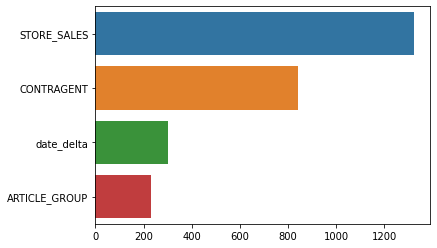

In [42]:
importances = pd.Series(bst.feature_importance(), index=X_test.columns).sort_values(ascending=False)
sns.barplot(y=importances.index, x=importances)
pass

Значение метрики стало таким же, что и у модели с годом и месяцем. Но значимость признака date_delta возросла по сравнению с значимостью признаков YEAR и MONTH

Воспользуемся one-hot-encoding для признака ARTICLE_GROUP

In [43]:
data = pd.get_dummies(data, prefix='ART_GROUP', columns=['ARTICLE_GROUP'])

In [44]:
test_df = data.query("YEAR == 2018 & MONTH == 2")
train_df = data.drop(test_df.index)

In [45]:
X_train = train_df.drop(['YEAR', 'MONTH', 'ARTICLE_CODE', 'ARTICLE_NAME','SALES', 'DAY', 'date'], axis=1)
y_train = train_df['SALES']
X_test = test_df.drop(['YEAR', 'MONTH', 'ARTICLE_CODE', 'ARTICLE_NAME', 'SALES', 'DAY', 'date'], axis=1)
y_test = test_df['SALES']

In [46]:
X_train.head()

,CONTRAGENT,STORE_SALES,date_delta,ART_GROUP_BEER,ART_GROUP_KEGS,ART_GROUP_LIQUOR,ART_GROUP_NON-ALCOHOL,ART_GROUP_REF,ART_GROUP_STR_SUPPLIES,ART_GROUP_WINE
0,ROYAL WINE CORP,0.0,0.0,0,0,0,0,0,0,1
1,SANTA MARGHERITA USA INC,0.0,0.0,0,0,0,0,0,0,1
2,JIM BEAM BRANDS CO,0.0,0.0,0,0,1,0,0,0,0
3,HEAVEN HILL DISTILLERIES INC,0.0,0.0,0,0,1,0,0,0,0
4,ROYAL WINE CORP,0.0,0.0,0,0,0,0,0,0,1


In [48]:
lg = lgb.LGBMRegressor(silent=False)
parametrs = {"n_estimators": range(10,200,10)}
grid_search_cv = GridSearchCV(lg, n_jobs=-1, param_grid=parametrs, cv=10)
grid_search_cv.fit(X_train,y_train)
best_n_estimators = grid_search_cv.best_estimator_.n_estimators
print(best_n_estimators)

90


In [49]:
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves':31, 'objective':'regression', 'learning_rate':0.06}
num_round = best_n_estimators
cate_features_name = ['CONTRAGENT']
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data], categorical_feature = cate_features_name)
y_test_predict_lgbm = bst.predict(X_test)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['CONTRAGENT']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	valid_0's l2: 1.67267e+08
[2]	valid_0's l2: 1.58658e+08
[3]	valid_0's l2: 1.51084e+08
[4]	valid_0's l2: 1.44208e+08
[5]	valid_0's l2: 1.38167e+08
[6]	valid_0's l2: 1.32879e+08
[7]	valid_0's l2: 1.28026e+08
[8]	valid_0's l2: 1.23766e+08
[9]	valid_0's l2: 1.20034e+08
[10]	valid_0's l2: 1.16686e+08
[11]	valid_0's l2: 1.13773e+08
[12]	valid_0's l2: 1.11148e+08
[13]	valid_0's l2: 1.08768e+08
[14]	valid_0's l2: 1.06587e+08
[15]	valid_0's l2: 1.04711e+08
[16]	valid_0's l2: 1.03046e+08
[17]	valid_0's l2: 1.01562e+08
[18]	valid_0's l2: 1.0031e+08
[19]	valid_0's l2: 9.91308e+07
[20]	valid_0's l2: 9.80926e+07
[21]	valid_0's l2: 9.72543e+07
[22]	valid_0's l2: 9.65214e+07
[23]	valid_0's l2: 9.57905e+07
[24]	valid_0's l2: 9.51242e+07
[25]	valid_0's l2: 9.45637e+07
[26]	valid_0's l2: 9.39954e+07
[27]	valid_0's l2: 9.3539e+07
[28]	valid_0's l2: 9.30771e+07
[29]	valid_0's l2: 9.27098e+07
[30]	valid_0's l2: 9.24251e+07
[31]	valid_0's l2: 9.20909e+07
[32]	valid_0's l2: 9.17364e+07
[33]	valid_0's l2: 

In [50]:
metric(y_test,y_test_predict_lgbm)

79.39241810850423

Признак 'CONTRAGENT' имеет 333 уникальных значения. Для его кодировки будем использовать среднее (целевое) кодирование. 

In [52]:
mean_encode = data.groupby('CONTRAGENT')['SALES'].mean()
mean_encode

CONTRAGENT
8 VINI INC                      308.888889
A HARDY USA LTD                 133.333333
A I G WINE & SPIRITS            313.000000
A VINTNERS SELECTIONS           993.969641
A&E INC                         303.157895
                                  ...     
WINEBOW INC                     177.142857
YOUNG WON TRADING INC          1373.631647
YUENGLING BREWERY             14960.393701
Z WINE GALLERY IMPORTS LLC      294.333333
ZURENA LLC                     1794.444444
Name: SALES, Length: 333, dtype: float64

In [53]:
data.loc[:,'CONTRAGENT_mean_enc'] = data['CONTRAGENT'].map(mean_encode)

In [54]:
test_df = data.query("YEAR == 2018 & MONTH == 2")
train_df = data.drop(test_df.index)

In [55]:
X_train = train_df.drop(['CONTRAGENT', 'YEAR', 'MONTH', 'ARTICLE_CODE', 'ARTICLE_NAME','SALES', 'DAY', 'date'], axis=1)
y_train = train_df['SALES']
X_test = test_df.drop(['CONTRAGENT', 'YEAR', 'MONTH', 'ARTICLE_CODE', 'ARTICLE_NAME', 'SALES', 'DAY', 'date'], axis=1)
y_test = test_df['SALES']

In [56]:
X_train.head()

,STORE_SALES,date_delta,ART_GROUP_BEER,ART_GROUP_KEGS,ART_GROUP_LIQUOR,ART_GROUP_NON-ALCOHOL,ART_GROUP_REF,ART_GROUP_STR_SUPPLIES,ART_GROUP_WINE,CONTRAGENT_mean_enc
0,0.0,0.0,0,0,0,0,0,0,1,1093.051870
1,0.0,0.0,0,0,0,0,0,0,1,9194.404762
2,0.0,0.0,0,0,1,0,0,0,0,10471.081481
3,0.0,0.0,0,0,1,0,0,0,0,13560.937774
4,0.0,0.0,0,0,0,0,0,0,1,1093.051870


In [60]:
lg = lgb.LGBMRegressor(silent=False)
parametrs = {"n_estimators": range(10,200,10)}
grid_search_cv = GridSearchCV(lg, n_jobs=-1, param_grid=parametrs, cv=10)
grid_search_cv.fit(X_train,y_train)
best_n_estimators = grid_search_cv.best_estimator_.n_estimators
print(best_n_estimators)

110


In [61]:
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves':31, 'objective':'regression', 'learning_rate':0.06}
num_round = best_n_estimators
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data])
y_test_predict_lgbm = bst.predict(X_test)

[1]	valid_0's l2: 1.67544e+08
[2]	valid_0's l2: 1.59284e+08
[3]	valid_0's l2: 1.52065e+08
[4]	valid_0's l2: 1.45613e+08
[5]	valid_0's l2: 1.39867e+08
[6]	valid_0's l2: 1.34802e+08
[7]	valid_0's l2: 1.30214e+08
[8]	valid_0's l2: 1.26302e+08
[9]	valid_0's l2: 1.22723e+08
[10]	valid_0's l2: 1.19488e+08
[11]	valid_0's l2: 1.16634e+08
[12]	valid_0's l2: 1.13987e+08
[13]	valid_0's l2: 1.1165e+08
[14]	valid_0's l2: 1.09572e+08
[15]	valid_0's l2: 1.07885e+08
[16]	valid_0's l2: 1.06218e+08
[17]	valid_0's l2: 1.04639e+08
[18]	valid_0's l2: 1.03308e+08
[19]	valid_0's l2: 1.0209e+08
[20]	valid_0's l2: 1.01099e+08
[21]	valid_0's l2: 1.00215e+08
[22]	valid_0's l2: 9.94458e+07
[23]	valid_0's l2: 9.86974e+07
[24]	valid_0's l2: 9.79871e+07
[25]	valid_0's l2: 9.74018e+07
[26]	valid_0's l2: 9.70441e+07
[27]	valid_0's l2: 9.65209e+07
[28]	valid_0's l2: 9.59699e+07
[29]	valid_0's l2: 9.54929e+07
[30]	valid_0's l2: 9.51014e+07
[31]	valid_0's l2: 9.46676e+07
[32]	valid_0's l2: 9.4384e+07
[33]	valid_0's l2: 9

In [62]:
metric(y_test,y_test_predict_lgbm)

80.9604518198973

Видим, что обработав все категориальные признаки, точность модели повысилась почти до 81%.